In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('dark_background')

In [2]:
data = pd.read_table('data/birds.dat')
data.head()

,tail_len,wing_len
0,191,284
1,197,285
2,208,288
3,180,273
4,180,275


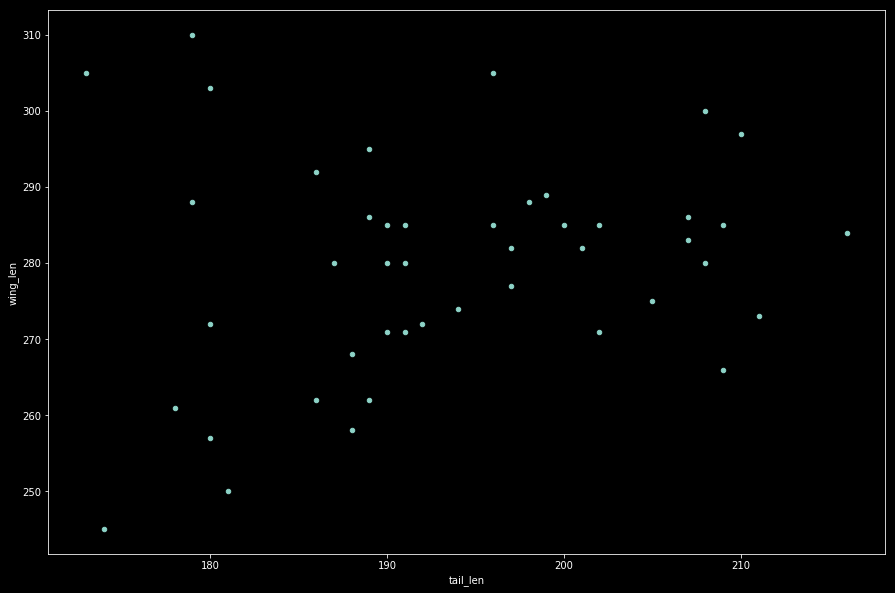

In [74]:
data.plot.scatter(x='tail_len', y='wing_len', figsize=(15, 10))

In [91]:
X = np.array(data['tail_len'])
y = data['wing_len']

data_mat = np.array([data['tail_len'], data['wing_len']]).T
np.random.shuffle(data_mat)

In [96]:
test_X = data_mat[-5:, 0:1]
test_y = data_mat[-5:, 1:]

train_X = data_mat[:-5, 0:1]
train_y = data_mat[:-5, 1:]

In [112]:
mdl = LinearRegression()
mdl.fit(train_X, train_y)
y_hat = mdl.predict(test_X).reshape((test_X.size))
test_y = test_y.reshape((test_y.size,))

In [114]:
output = pd.DataFrame(data = { 'y_predicted': y_hat, 'y_real': test_y.reshape(test_y.size), 'y_diff': test_y-y_hat, 'error': np.square(test_y-y_hat) })
output

,y_predicted,y_real,y_diff,error
0,278.939462,257,-21.939462,481.339988
1,283.686099,266,-17.686099,312.798086
2,279.103139,250,-29.103139,846.992700
3,282.049327,289,6.950673,48.311850
4,284.831839,284,-0.831839,0.691955


MSE: 338.0269158840927


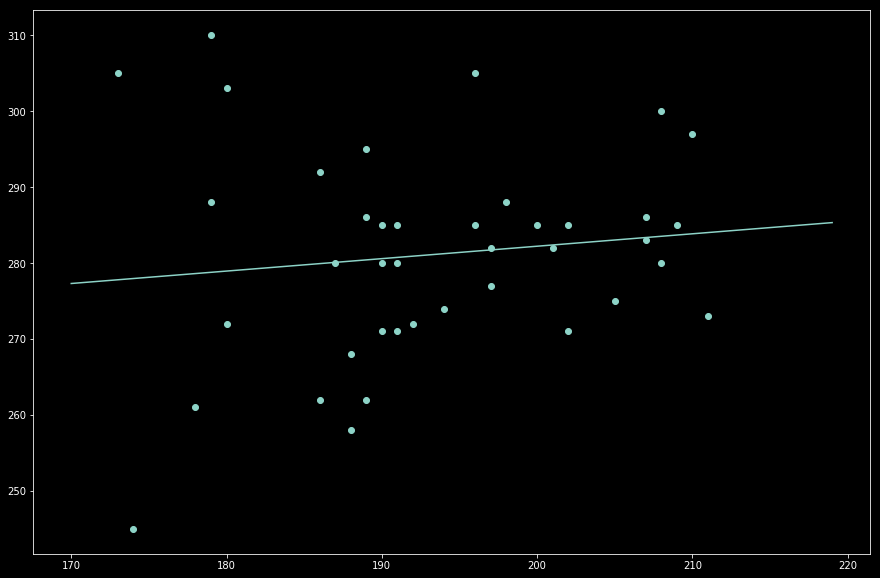

In [115]:
# ax = data.plot.scatter(x='tail_len', y='wing_len')
total = np.arange(170, 220, 1)
y_total = mdl.predict(total[:, np.newaxis])

# plt.plot(test_X, output['y_predicted'])
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(total, y_total)
ax.scatter(train_X, train_y)

print('MSE: {}'.format(sum(output['error']) / len(output)))

In [77]:
weather = pd.read_csv('data/weather.csv', low_memory=False)
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


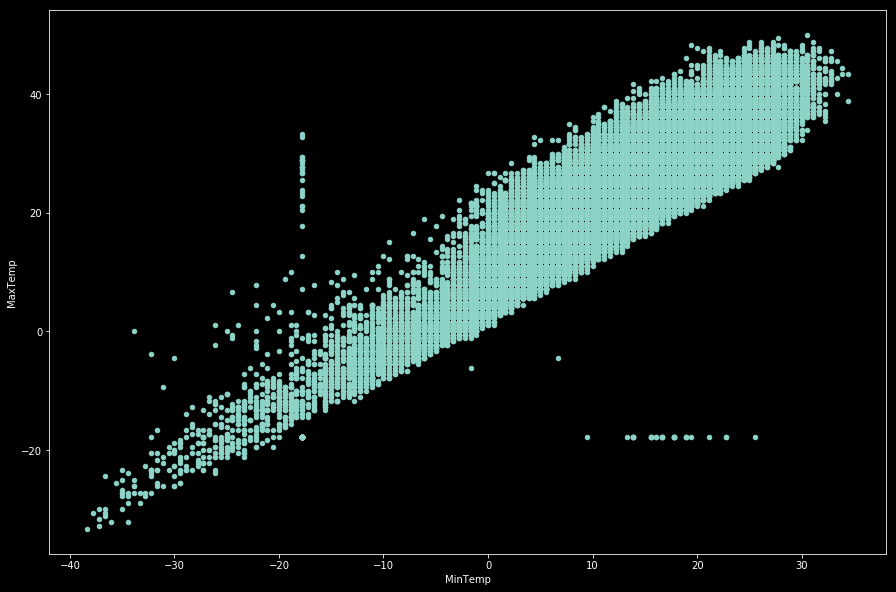

In [72]:
ax = weather.plot.scatter(x='MinTemp', y='MaxTemp', figsize=(15, 10))
# ax.plot(weather['MinTemp'], weather['MaxTemp'])

In [119]:
w_mat = np.array([weather['MinTemp'], weather['MaxTemp']]).T
np.random.shuffle(w_mat)
w_X = w_mat[:, 0]
w_y = w_mat[:, 1]

w_train_X = w_X[:-2000, np.newaxis]
w_train_y = w_y[:-2000, np.newaxis]

w_test_X = w_X[-2000:, np.newaxis]
w_test_y = w_y[-2000:]
# w_X.shape

In [120]:
mdl = LinearRegression()
mdl.fit(w_train_X, w_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE: 85.80305373711585


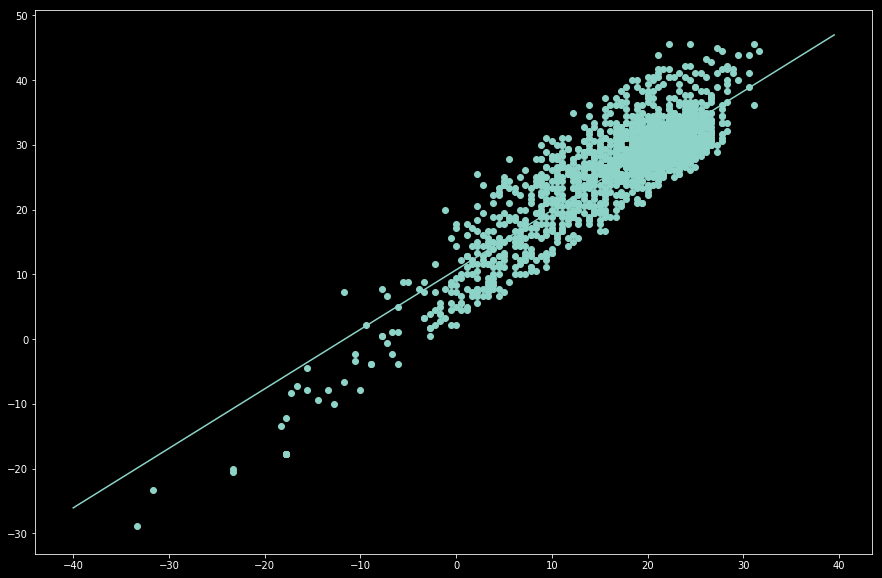

In [121]:
y_hat = mdl.predict(w_test_X)
print('MSE: {}'.format(np.mean(np.square(y_hat - w_test_X))))
gen_X = np.arange(-40, 40, 0.5)
gen_y = mdl.predict(gen_X[:, np.newaxis])

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(gen_X, gen_y)
ax.scatter(w_test_X, w_test_y)